# GPS TRAJECTORY AND OPEN STREET MAP NETWORK

How to identify the exact trajectory of a user in a given road network ? How to match the GPS trajectory to actual streets ?
In fact, GPS tracker are prone to disturbance. A lack of satellites connection, a signal biased during its travel in the atmosphere, receptor quality contribute to the creation of noise, resulting in an inaccuracy trajectory.
The following script focus on the creation of algorithms for trajectory matching to Open Street Map routes.

## 1. Setting the environment

### 1.1. Librairies used

In [1]:
import osmnx as ox                  # Open Street Map 
import matplotlib.pyplot as plt    
import numpy as np

import json                         # Reading GeoJson Files
from track import *
import pyoproj as proj              # Ortho Projection

import matplotlib.image as mpimg

### 1.2. Point properties

In [2]:
data = readGeojson('unzip/track.geojson')    
data?

### 1.3. Open the track.geojson, extract parameters and properties (longitude, latitude etc.)

In [3]:
lat, lon = extractCoordinates(data)

### 1.4. Create the OSM network

In [4]:
graph = ox.graph_from_bbox(
        np.max(lat), np.min(lat), np.max(lon), np.min(lon),
        simplify=False,
        retain_all=True,
        network_type='all'
    )

## 2. Plot the graph

The OSM network and the track are plotted on the same graph.

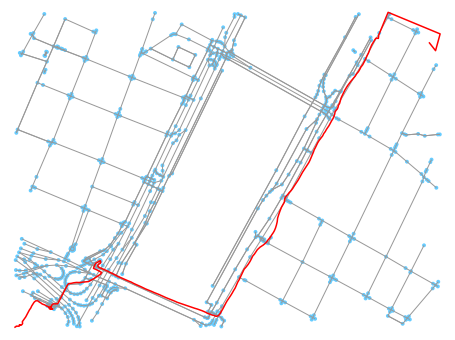

In [5]:
fig, ax = ox.plot_graph(graph, show=False, close=False) 

ax.plot(lon, lat, color='red')
plt.show()

# 2. Algorithms

## 2.1. Match to closest edges

The following algorithm will match every point of the track to the closest edge of the OSM network. The algorithm is based on computing an orthogonal projection to the closest edge.

### 2.1.1. Projection

(-0.25, 5.25, -0.25, 5.25)

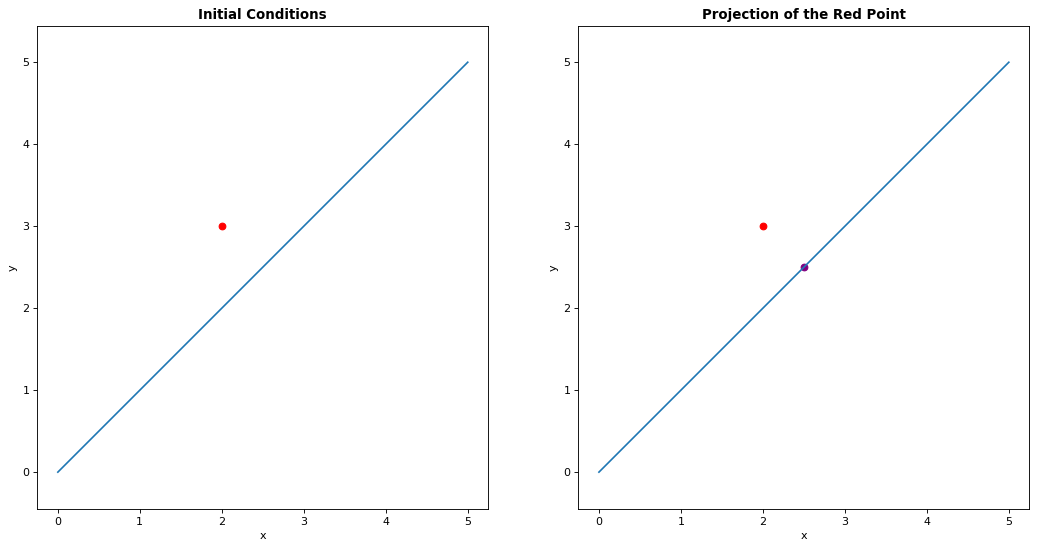

In [37]:
plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
    
#1 Line
plt.subplot(1, 2, 1)
pointB = (0, 0)         # point that belongs to the line
pointC = (5, 5)
X, Y = [0, 5], [0, 5]
plt.plot(X, Y)

#2 Point
pointA = (2, 3)         # random point
x, y = pointA
plt.scatter(x, y, color='red')

plt.title("Initial Conditions", fontweight="bold")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")

#3 Ortho
plt.subplot(1, 2, 2)
S = proj.slope(pointB, pointC)
pointH = proj.orthoProj(pointA, pointB, S)
plt.plot(X, Y)
plt.scatter(x, y, color='red')
plt.scatter(pointH[0], pointH[1], color="purple")

plt.title("Projection of the Red Point", fontweight="bold")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")

### 2.1.2. Application

Warning : The algorithm can take a lot of time to finish, as for each points of the track it looks for the nearest edge.

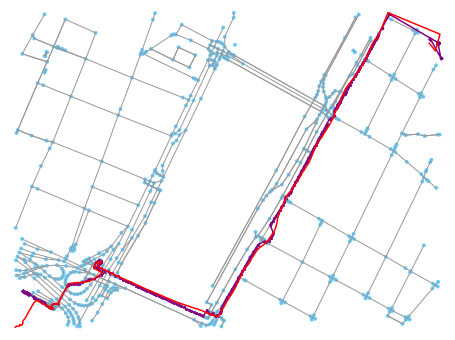

In [39]:
lat_corr, lon_corr = matchToClosestEdges(graph, lat, lon, display=False)

# Results
fig, ax = ox.plot_graph(graph, show=False, close=False) 

plt.plot(lon_corr, lat_corr, color="purple")
plt.scatter(lon_corr, lat_corr, s=5, color="purple")

ax.plot(lon, lat, color='red')
plt.show()

## 2.2. Hidden Markov Models